In [11]:
import numpy as np

from scipy import stats
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 8])

correlation, p_value = stats.pearsonr(x, y)
print(f"r = {correlation}")
print(f"p_value = {p_value}") # should be < 0.05 

X = x.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]
print(f"B_0 = {beta_0}")
print(f"B_1 = {beta_1}")
print(f"Linear Equatation: y = {beta_0:.2f} + {beta_1:.2f}x")

r_squared = model.score(X, y)
print(f"R² = {r_squared} => model explains - {r_squared:.2%} ") 
print(f"(r) R² = {correlation**2}(for simple linear regression)")

r = 0.9922778767136677
p_value = 0.0008136455681979813
B_0 = 0.20000000000000018
B_1 = 1.5999999999999999
Linear Equatation: y = 0.20 + 1.60x
R² = 0.9846153846153847 => model explains - 98.46% 
(r) R² = 0.9846153846153848(for simple linear regression)


In [15]:
new_x = 6
known_y = 10

new_x_array = np.array([[new_x]])
predicted_y = model.predict(new_x_array)[0]

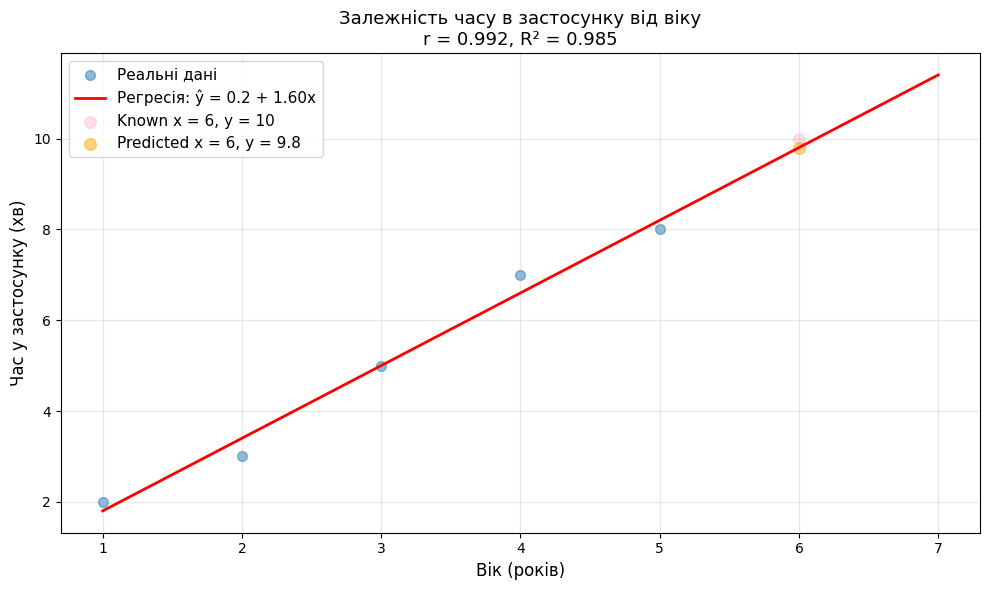

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.5, s=50, label='Реальні дані')

session_range = np.linspace(x.min(), 7, 100)
time_predicted = beta_0 + beta_1 * session_range
plt.plot(session_range, time_predicted, 'r-', linewidth=2,
         label=f'Регресія: ŷ = {beta_0:.1f} + {beta_1:.2f}x')
plt.scatter(new_x, known_y, color='pink', alpha=0.5, s=70, label='Known x = 6, y = 10 ')
plt.scatter(new_x, predicted_y, color='orange', alpha=0.5, s=70, label=f'Predicted x = 6, y = {predicted_y} ')

plt.xlabel('Вік (років)', fontsize=12)
plt.ylabel('Час у застосунку (хв)', fontsize=12)
plt.title(f'Залежність часу в застосунку від віку\nr = {correlation:.3f}, R² = {r_squared:.3f}',
          fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()